In [22]:
# ================================================
# 1️⃣ Import Libraries
# ================================================
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

# ================================================
# 2️⃣ Load the MNIST Dataset (Images of Digits)
# ================================================
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

print("Training data shape:", train_images.shape)
print("Testing data shape:", test_images.shape)
print("Labels range:", np.unique(train_labels))

Training data shape: (60000, 28, 28)
Testing data shape: (10000, 28, 28)
Labels range: [0 1 2 3 4 5 6 7 8 9]


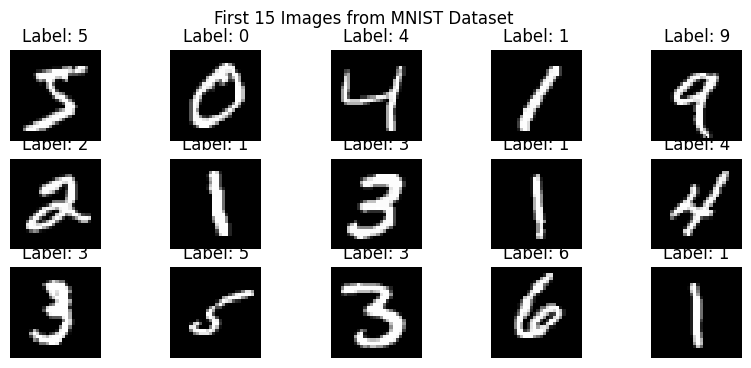

In [23]:
# ================================================
# 3️⃣ Visualize First 15 Images
# ================================================
plt.figure(figsize=(10, 4))
for i in range(15):
    plt.subplot(3, 5, i + 1)
    plt.imshow(train_images[i], cmap='gray')
    plt.title(f"Label: {train_labels[i]}")
    plt.axis('off')
plt.suptitle("First 15 Images from MNIST Dataset")
plt.show()

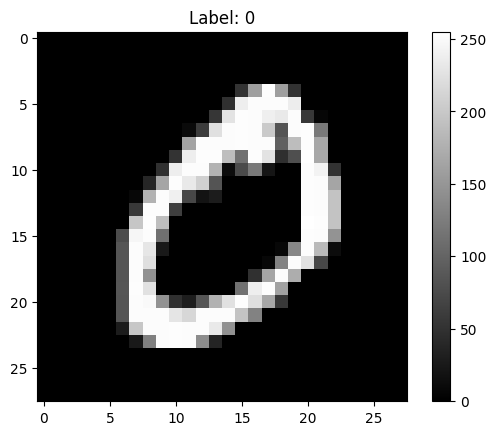

In [24]:
# ================================================
# 4️⃣ Display a Few Single Images and Their Pixel Values
# ================================================
index = 1 # you can change index to any number 0–59999
plt.imshow(train_images[index], cmap='gray')
plt.title(f"Label: {train_labels[index]}")
plt.colorbar()
plt.show()


In [25]:
print(f"\nPixel values of image at index {index}:")
print(train_images[index]) # shows 28x28 pixel values


Pixel values of image at index 1:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  51 159 253
  159  50   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0  48 238 252 252
  252 237   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  54 227 253 252 239
  233 252  57   6   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  10  60 224 252 253 252 202
   84 252 253 122   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0

In [13]:
# ================================================
# 5️⃣ Preprocess Data
# ================================================
# Add channel dimension (grayscale → 1 channel)
train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))


In [14]:

# Normalize pixel values (0–255 → 0–1)
train_images, test_images = train_images / 255.0, test_images / 255.0

print("\nAfter normalization:")
print("Pixel value range:", train_images.min(), "to", train_images.max())


After normalization:
Pixel value range: 0.0 to 1.0


In [15]:
# ================================================
# 6️⃣ Build a Simple CNN (No Pooling or Padding)
# ================================================
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')  # 10 classes for digits 0–9
])

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 24, 24, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 36864)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │     2,359,360 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,378,826 (9.07 MB)

 Trainable params: 2,378,826 (9.07 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# ================================================
# 7️⃣ Compile and Train the Model
# ================================================
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=5,
                    validation_data=(test_images, test_labels))

In [17]:
# ================================================
# 8️⃣ Evaluate on Test Data
# ================================================
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f"\nTest accuracy: {test_acc:.4f}")

# ================================================
# 9️⃣ Visualize Training Accuracy
# ================================================
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title("Training vs Validation Accuracy")
plt.show()


KeyboardInterrupt: 